In [ ]:
#Importing the necessary Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from xgboost import  XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Walmart=pd.read_csv("/Walmart_sales_year .csv")
Walmart

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2/12/2010,2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19/02/2010,2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26/02/2010,2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,3/5/2010,2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,10/5/2012,2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,10/12/2012,2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19/10/2012,2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
Walmart.head(5)

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2/12/2010,2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19/02/2010,2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26/02/2010,2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,3/5/2010,2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:

Walmart.tail()

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28/09/2012,2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,10/5/2012,2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,10/12/2012,2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19/10/2012,2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26/10/2012,2012,760281.43,0,58.85,3.882,192.308899,8.667


In [ ]:
Walmart.describe()

,Store,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2010.965035,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,0.797019,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2010.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
#Checking for the number of rows and columns
Walmart.shape

(6435, 9)

In [ ]:
#Checking the components of the data
Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Year          6435 non-null   int64  
 3   WeeklySales   6435 non-null   float64
 4   HolidayFlag   6435 non-null   int64  
 5   Temperature   6435 non-null   float64
 6   Fuel_Price    6435 non-null   float64
 7   CPI           6435 non-null   float64
 8   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 452.6+ KB


In [ ]:
#Checking for null values
Walmart.isna().sum()

Store           0
Date            0
Year            0
WeeklySales     0
HolidayFlag     0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#changing the store and weekly sales column to an integer
Walmart[["Store","WeeklySales"]] = Walmart[["Store","WeeklySales"]].astype(int)
print(Walmart.dtypes)

Store             int64
Date             object
Year              int64
WeeklySales       int64
HolidayFlag       int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [ ]:
Walmart

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2/5/2010,2010,1643690,0,42.31,2.572,211.096358,8.106
1,1,2/12/2010,2010,1641957,1,38.51,2.548,211.242170,8.106
2,1,19/02/2010,2010,1611968,0,39.93,2.514,211.289143,8.106
3,1,26/02/2010,2010,1409727,0,46.63,2.561,211.319643,8.106
4,1,3/5/2010,2010,1554806,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,2012,713173,0,64.88,3.997,192.013558,8.684
6431,45,10/5/2012,2012,733455,0,64.89,3.985,192.170412,8.667
6432,45,10/12/2012,2012,734464,0,54.47,4.000,192.327265,8.667
6433,45,19/10/2012,2012,718125,0,56.47,3.969,192.330854,8.667


In [ ]:
Walmart.columns

Index(['Store', 'Date', 'Year', 'WeeklySales', 'HolidayFlag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
#Getting the yearly sales per store
yearly_sales = pd.crosstab(index=Walmart['Store'], columns=Walmart['Year'], values=Walmart['WeeklySales'],  aggfunc='sum')
yearly_sales


Year,2010,2011,2012
Store,,,
1,73278810,80921890,68202034
2,95277839,98607856,81496678
3,18745395,20816852,18024419
4,95680448,111092267,92771166
5,14836007,16470794,14168816
6,76912295,80528739,66315025
7,25568057,30662613,25367535
8,43204451,47512764,39233900
9,25129194,28685948,23974010


In [ ]:
# Aggregate the 'WeeklySales' column to get yearly sales
yearly_sales =Walmart .groupby('Year')['WeeklySales'].sum().reset_index()

# Rename the columns for clarity
yearly_sales.columns = ['Year', 'YearlySales']

# Merge the new 'YearlySales' column back to the original DataFrame
Walmart= pd.merge(Walmart, yearly_sales, on='Year', how='left')

# Display the updated DataFrame
Walmart

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
0,1,2/5/2010,2010,1643690,0,42.31,2.572,211.096358,8.106,2288885060
1,1,2/12/2010,2010,1641957,1,38.51,2.548,211.242170,8.106,2288885060
2,1,19/02/2010,2010,1611968,0,39.93,2.514,211.289143,8.106,2288885060
3,1,26/02/2010,2010,1409727,0,46.63,2.561,211.319643,8.106,2288885060
4,1,3/5/2010,2010,1554806,0,46.50,2.625,211.350143,8.106,2288885060
...,...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,2012,713173,0,64.88,3.997,192.013558,8.684,2000131911
6431,45,10/5/2012,2012,733455,0,64.89,3.985,192.170412,8.667,2000131911
6432,45,10/12/2012,2012,734464,0,54.47,4.000,192.327265,8.667,2000131911
6433,45,19/10/2012,2012,718125,0,56.47,3.969,192.330854,8.667,2000131911


In [ ]:
#Getting the yearly sales per year
yearly_sales = pd.crosstab(Walmart['YearlySales'],Walmart['Year'])
yearly_sales


Year,2010,2011,2012
YearlySales,,,
2000131911,0,0,1935
2288885060,2160,0,0
2448198853,0,2340,0


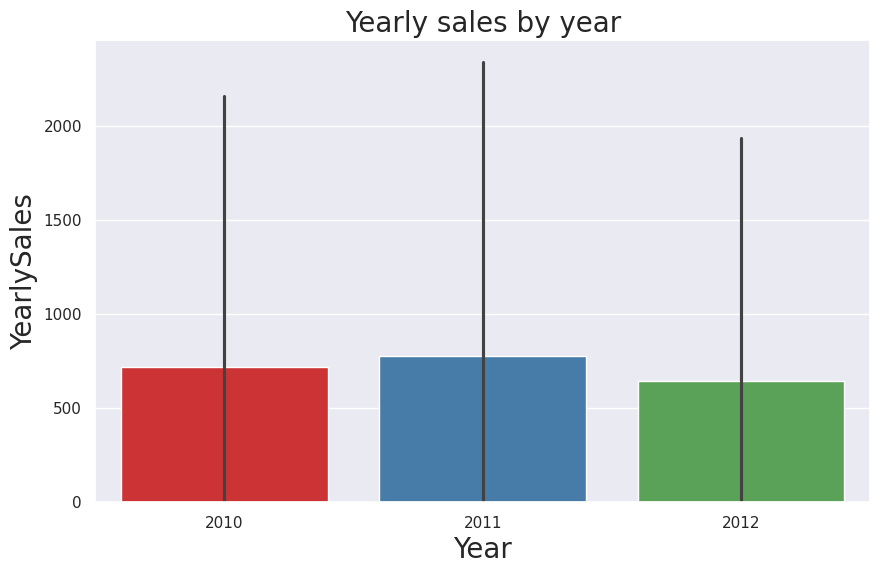

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=yearly_sales,orient='v',palette="Set1")
plt.title("Yearly sales by year",fontdict={"fontsize":20})
plt.xlabel("Year",size =20)
plt.ylabel("YearlySales",size= 20)
plt.show()

# OR

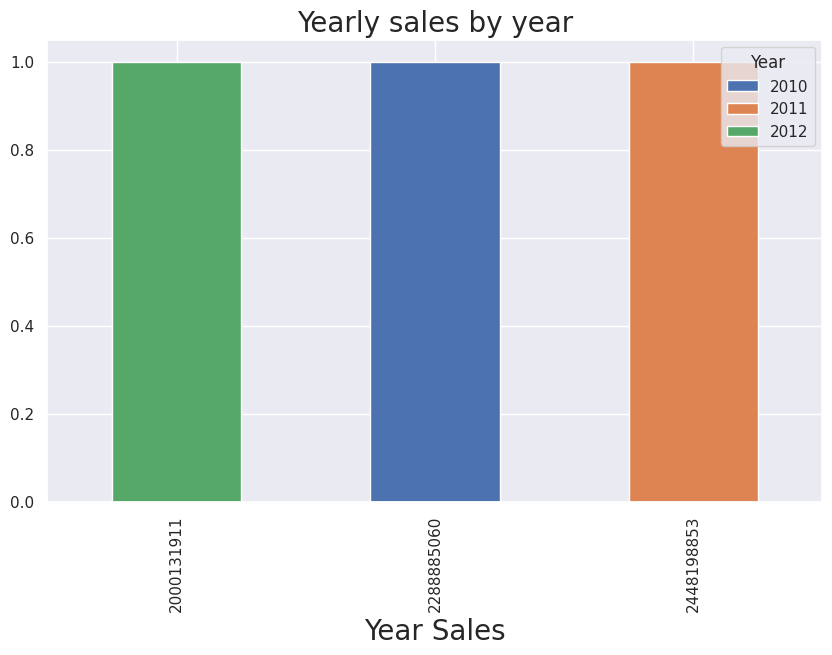

In [ ]:

yearly_sales.div(yearly_sales.sum(1).astype(float),axis = 0).plot(kind= "bar",stacked= True,figsize=(10,6))
plt.title("Yearly sales by year",fontdict={"fontsize":20})
plt.xlabel("Year Sales",size =20)
plt.show()

In [ ]:
Walmart

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
0,1,2/5/2010,2010,1643690,0,42.31,2.572,211.096358,8.106,2288885060
1,1,2/12/2010,2010,1641957,1,38.51,2.548,211.242170,8.106,2288885060
2,1,19/02/2010,2010,1611968,0,39.93,2.514,211.289143,8.106,2288885060
3,1,26/02/2010,2010,1409727,0,46.63,2.561,211.319643,8.106,2288885060
4,1,3/5/2010,2010,1554806,0,46.50,2.625,211.350143,8.106,2288885060
...,...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,2012,713173,0,64.88,3.997,192.013558,8.684,2000131911
6431,45,10/5/2012,2012,733455,0,64.89,3.985,192.170412,8.667,2000131911
6432,45,10/12/2012,2012,734464,0,54.47,4.000,192.327265,8.667,2000131911
6433,45,19/10/2012,2012,718125,0,56.47,3.969,192.330854,8.667,2000131911


In [ ]:
#Top 5 weekly sales by year
Walmart_Top_5=Walmart.nlargest(5,"WeeklySales")
Walmart_Top_5



,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
1905,14,24/12/2010,2010,3818686,0,30.59,3.141,182.544590,8.724,2288885060
2763,20,24/12/2010,2010,3766687,0,25.17,3.141,204.637673,7.484,2288885060
1333,10,24/12/2010,2010,3749057,0,57.06,3.236,126.983581,9.003,2288885060
527,4,23/12/2011,2011,3676388,0,35.92,3.103,129.984548,5.143,2448198853
1762,13,24/12/2010,2010,3595903,0,34.90,2.846,126.983581,7.795,2288885060


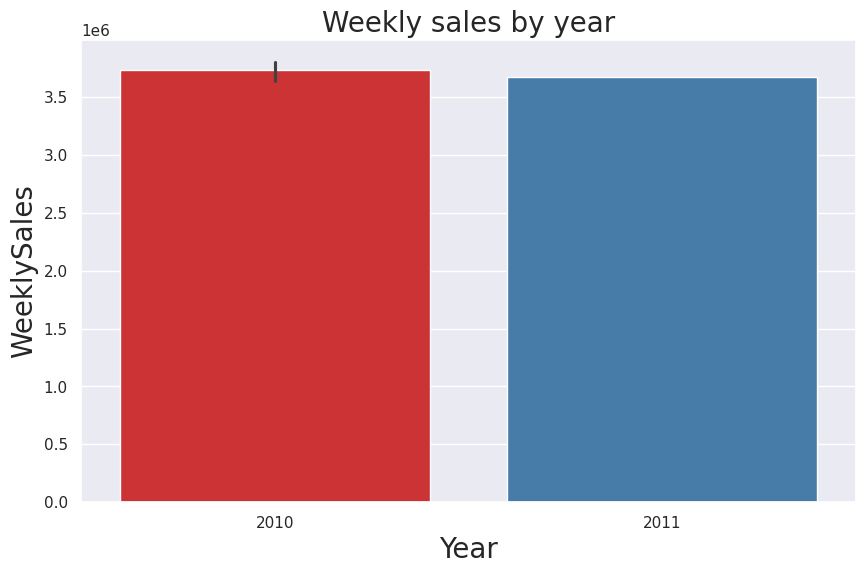

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Year",y ="WeeklySales",data=Walmart_Top_5,orient='v',palette="Set1")
plt.title("Weekly sales by year",fontdict={"fontsize":20})
plt.xlabel("Year",size =20)
plt.ylabel("WeeklySales",size= 20)
plt.show()

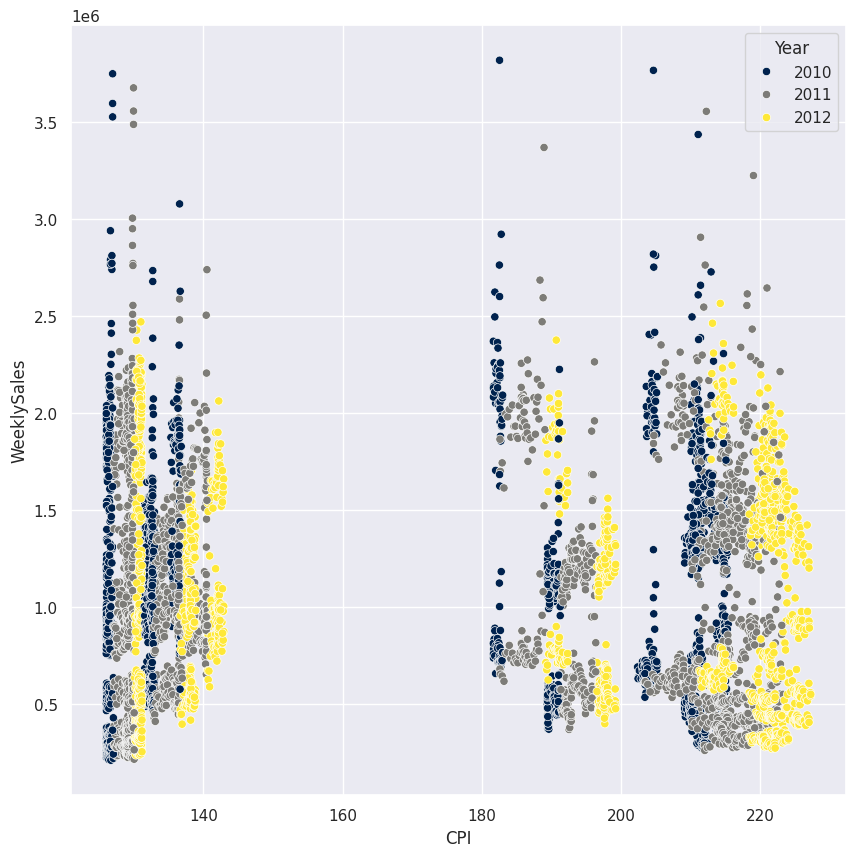

In [ ]:
#(A value of 0 denotes individuals who did not take a holiday, while a value of 1 signifies those who had a holiday.)
plt.figure(figsize=(10,10))
sns.scatterplot(x="CPI",y="WeeklySales",data =Walmart, hue="Year",palette='cividis')
plt.show()

In [ ]:
Walmart

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
0,1,2/5/2010,2010,1643690,0,42.31,2.572,211.096358,8.106,2288885060
1,1,2/12/2010,2010,1641957,1,38.51,2.548,211.242170,8.106,2288885060
2,1,19/02/2010,2010,1611968,0,39.93,2.514,211.289143,8.106,2288885060
3,1,26/02/2010,2010,1409727,0,46.63,2.561,211.319643,8.106,2288885060
4,1,3/5/2010,2010,1554806,0,46.50,2.625,211.350143,8.106,2288885060
...,...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,2012,713173,0,64.88,3.997,192.013558,8.684,2000131911
6431,45,10/5/2012,2012,733455,0,64.89,3.985,192.170412,8.667,2000131911
6432,45,10/12/2012,2012,734464,0,54.47,4.000,192.327265,8.667,2000131911
6433,45,19/10/2012,2012,718125,0,56.47,3.969,192.330854,8.667,2000131911


In [ ]:
#Top 5 fuel price by weekly sales
Walmart_Top_fuel=Walmart.nlargest(10,"Fuel_Price")
Walmart_Top_fuel

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
1427,10,10/12/2012,2012,1713889,0,76.03,4.468,131.108333,6.943,2000131911
1713,12,10/12/2012,2012,934917,0,71.74,4.468,131.108333,10.199,2000131911
4001,28,10/12/2012,2012,1205536,0,71.74,4.468,131.108333,10.199,2000131911
4716,33,10/12/2012,2012,291781,0,79.64,4.468,131.108333,6.895,2000131911
5431,38,10/12/2012,2012,437320,0,71.74,4.468,131.108333,10.199,2000131911
6003,42,10/12/2012,2012,612379,0,76.03,4.468,131.108333,6.943,2000131911
1428,10,19/10/2012,2012,1734834,0,72.71,4.449,131.149968,6.943,2000131911
1714,12,19/10/2012,2012,960945,0,68.66,4.449,131.149968,10.199,2000131911
4002,28,19/10/2012,2012,1143724,0,68.66,4.449,131.149968,10.199,2000131911
4717,33,19/10/2012,2012,254412,0,75.55,4.449,131.149968,6.895,2000131911


In [ ]:
Walmart["CPI"].unique().astype(int)

array([211, 211, 211, ..., 214, 214, 214])

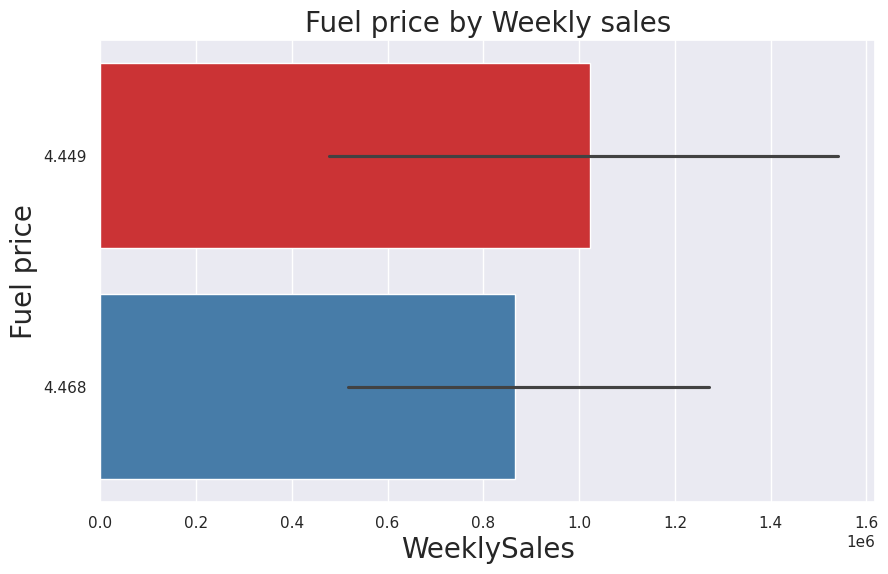

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="WeeklySales",y ="Fuel_Price",data=Walmart_Top_fuel,orient='h',palette="Set1")
plt.title("Fuel price by Weekly sales",fontdict={"fontsize":20})
plt.xlabel("WeeklySales",size =20)
plt.ylabel("Fuel price",size= 20)
plt.show()

In [ ]:
#Top 5 Unemployment by store

Walmart_Top_Unemployment=Walmart.nlargest(20,"Unemployment")
Walmart_Top_Unemployment

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
1607,12,10/1/2010,2010,850936,0,85.20,3.001,126.234600,14.313,2288885060
1608,12,10/8/2010,2010,918335,0,71.82,3.013,126.279167,14.313,2288885060
1609,12,15/10/2010,2010,862419,0,75.00,2.976,126.326677,14.313,2288885060
1610,12,22/10/2010,2010,857883,0,68.85,3.014,126.381548,14.313,2288885060
1611,12,29/10/2010,2010,955294,0,61.09,3.016,126.436419,14.313,2288885060
1612,12,11/5/2010,2010,929690,0,65.49,3.129,126.491290,14.313,2288885060
1613,12,11/12/2010,2010,942475,0,57.79,3.130,126.546161,14.313,2288885060
1614,12,19/11/2010,2010,894493,0,58.18,3.161,126.607200,14.313,2288885060
1615,12,26/11/2010,2010,1601377,1,47.66,3.162,126.669267,14.313,2288885060
1616,12,12/3/2010,2010,1069533,0,43.33,3.041,126.731333,14.313,2288885060


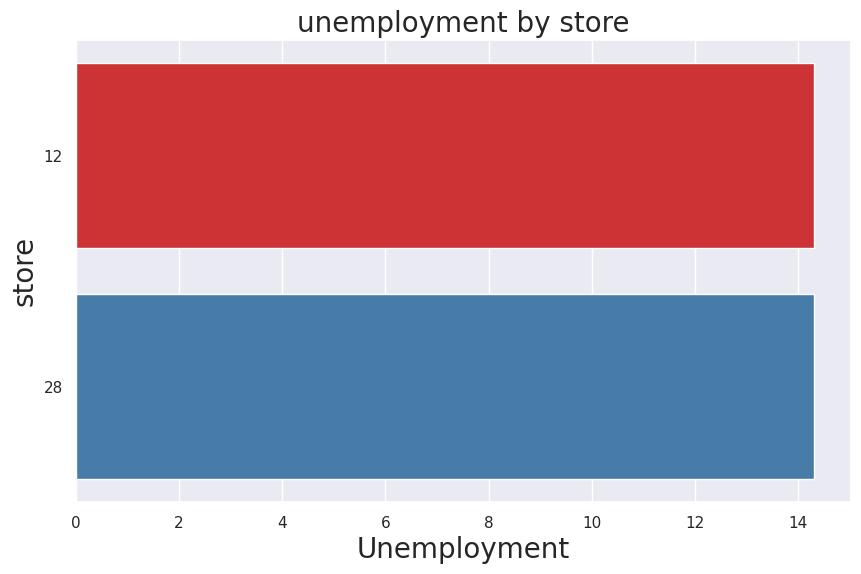

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Unemployment",y ="Store",data=Walmart_Top_Unemployment,orient='h',palette="Set1")
plt.title("unemployment by store",fontdict={"fontsize":20})
plt.xlabel("Unemployment",size =20)
plt.ylabel("store",size= 20)
plt.show()

In [ ]:
#Top 5 Unemployment by year
Walmart_Top_Unemployment=Walmart.nlargest(20,"Unemployment")
Walmart_Top_Unemployment

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
1607,12,10/1/2010,2010,850936,0,85.20,3.001,126.234600,14.313,2288885060
1608,12,10/8/2010,2010,918335,0,71.82,3.013,126.279167,14.313,2288885060
1609,12,15/10/2010,2010,862419,0,75.00,2.976,126.326677,14.313,2288885060
1610,12,22/10/2010,2010,857883,0,68.85,3.014,126.381548,14.313,2288885060
1611,12,29/10/2010,2010,955294,0,61.09,3.016,126.436419,14.313,2288885060
1612,12,11/5/2010,2010,929690,0,65.49,3.129,126.491290,14.313,2288885060
1613,12,11/12/2010,2010,942475,0,57.79,3.130,126.546161,14.313,2288885060
1614,12,19/11/2010,2010,894493,0,58.18,3.161,126.607200,14.313,2288885060
1615,12,26/11/2010,2010,1601377,1,47.66,3.162,126.669267,14.313,2288885060
1616,12,12/3/2010,2010,1069533,0,43.33,3.041,126.731333,14.313,2288885060


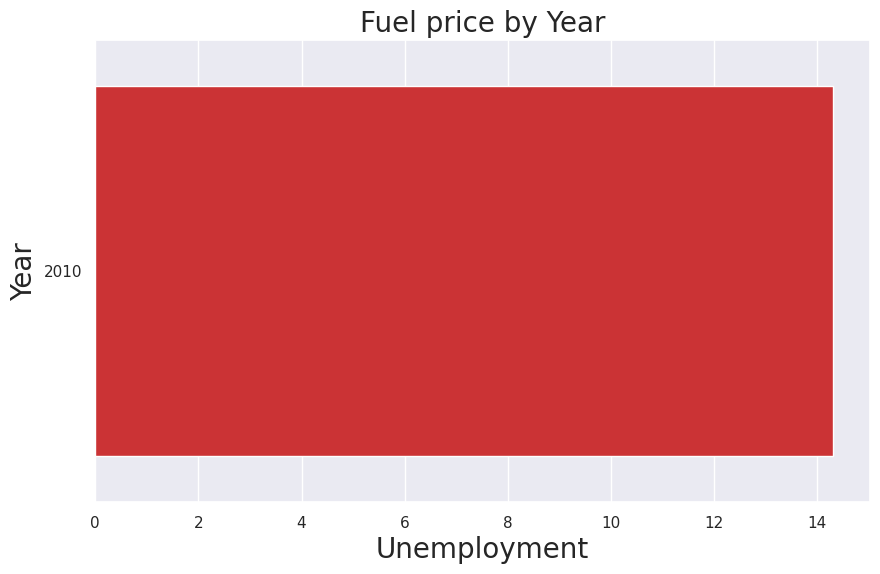

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="Unemployment",y ="Year",data=Walmart_Top_Unemployment,orient='h',palette="Set1")
plt.title("Fuel price by Year",fontdict={"fontsize":20})
plt.xlabel("Unemployment",size =20)
plt.ylabel("Year",size= 20)
plt.show()

In [ ]:
Walmart

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
0,1,2/5/2010,2010,1643690,0,42.31,2.572,211.096358,8.106,2288885060
1,1,2/12/2010,2010,1641957,1,38.51,2.548,211.242170,8.106,2288885060
2,1,19/02/2010,2010,1611968,0,39.93,2.514,211.289143,8.106,2288885060
3,1,26/02/2010,2010,1409727,0,46.63,2.561,211.319643,8.106,2288885060
4,1,3/5/2010,2010,1554806,0,46.50,2.625,211.350143,8.106,2288885060
...,...,...,...,...,...,...,...,...,...,...
6430,45,28/09/2012,2012,713173,0,64.88,3.997,192.013558,8.684,2000131911
6431,45,10/5/2012,2012,733455,0,64.89,3.985,192.170412,8.667,2000131911
6432,45,10/12/2012,2012,734464,0,54.47,4.000,192.327265,8.667,2000131911
6433,45,19/10/2012,2012,718125,0,56.47,3.969,192.330854,8.667,2000131911


In [ ]:

Walmart_new=Walmart.drop(["Date"],axis=1)
Walmart_new

,Store,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
0,1,2010,1643690,0,42.31,2.572,211.096358,8.106,2288885060
1,1,2010,1641957,1,38.51,2.548,211.242170,8.106,2288885060
2,1,2010,1611968,0,39.93,2.514,211.289143,8.106,2288885060
3,1,2010,1409727,0,46.63,2.561,211.319643,8.106,2288885060
4,1,2010,1554806,0,46.50,2.625,211.350143,8.106,2288885060
...,...,...,...,...,...,...,...,...,...
6430,45,2012,713173,0,64.88,3.997,192.013558,8.684,2000131911
6431,45,2012,733455,0,64.89,3.985,192.170412,8.667,2000131911
6432,45,2012,734464,0,54.47,4.000,192.327265,8.667,2000131911
6433,45,2012,718125,0,56.47,3.969,192.330854,8.667,2000131911


In [ ]:
=plt.figure(figsize=(10,6))
sns.distplot(Walmart_new["HolidayFlag"])
plt.show()

SyntaxError: invalid syntax (<ipython-input-34-a91a901f33fc>, line 1)

In [ ]:
#Top 5 fuel price by HolidayFlag
Walmart_Top_fuel=Walmart.nlargest(200,"Fuel_Price")
Walmart_Top_fuel

,Store,Date,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
1427,10,10/12/2012,2012,1713889,0,76.03,4.468,131.108333,6.943,2000131911
1713,12,10/12/2012,2012,934917,0,71.74,4.468,131.108333,10.199,2000131911
4001,28,10/12/2012,2012,1205536,0,71.74,4.468,131.108333,10.199,2000131911
4716,33,10/12/2012,2012,291781,0,79.64,4.468,131.108333,6.895,2000131911
5431,38,10/12/2012,2012,437320,0,71.74,4.468,131.108333,10.199,2000131911
...,...,...,...,...,...,...,...,...,...,...
1409,10,6/8/2012,2012,1840491,0,86.87,4.103,130.889677,7.382,2000131911
1695,12,6/8/2012,2012,1086231,0,84.83,4.103,130.889677,11.627,2000131911
3983,28,6/8/2012,2012,1440687,0,84.83,4.103,130.889677,11.627,2000131911
4698,33,6/8/2012,2012,286082,0,90.94,4.103,130.889677,7.396,2000131911


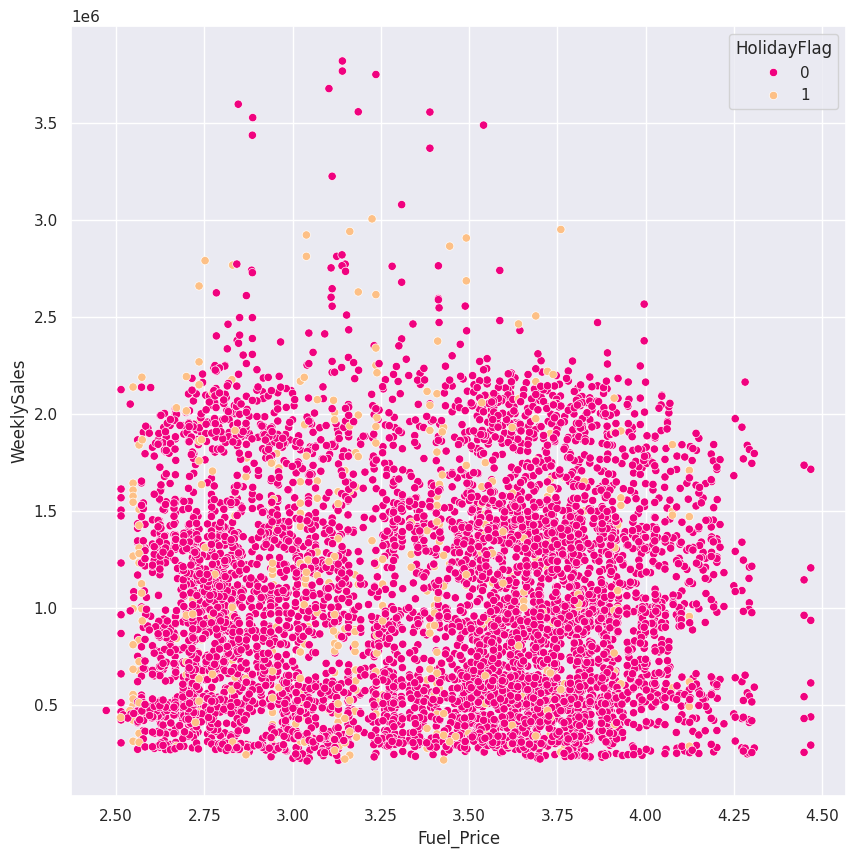

In [ ]:
#(A value of 0 denotes individuals who did not take a holiday, while a value of 1 signifies those who had a holiday.)
plt.figure(figsize=(10,10))
sns.scatterplot(x="Fuel_Price",y="WeeklySales",data =Walmart_new, hue="HolidayFlag",palette='Accent_r')
plt.show()

In [ ]:
Walmart_new

,Store,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
0,1,2010,1643690,0,42.31,2.572,211.096358,8.106,2288885060
1,1,2010,1641957,1,38.51,2.548,211.242170,8.106,2288885060
2,1,2010,1611968,0,39.93,2.514,211.289143,8.106,2288885060
3,1,2010,1409727,0,46.63,2.561,211.319643,8.106,2288885060
4,1,2010,1554806,0,46.50,2.625,211.350143,8.106,2288885060
...,...,...,...,...,...,...,...,...,...
6430,45,2012,713173,0,64.88,3.997,192.013558,8.684,2000131911
6431,45,2012,733455,0,64.89,3.985,192.170412,8.667,2000131911
6432,45,2012,734464,0,54.47,4.000,192.327265,8.667,2000131911
6433,45,2012,718125,0,56.47,3.969,192.330854,8.667,2000131911


# Feature Selection With Correlation Method

In [ ]:
Walmart_new_corr=Walmart_new.corr()
Walmart_new_corr

,Store,Year,WeeklySales,HolidayFlag,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
Store,1.000000e+00,3.474318e-12,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-2.649641e-14
Year,3.474318e-12,1.000000e+00,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,-6.024828e-01
WeeklySales,-3.353320e-01,-1.837754e-02,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,1.078273e-02
HolidayFlag,-4.386841e-16,-5.678257e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,5.226708e-02
Temperature,-2.265908e-02,6.426923e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,-1.014737e-01
Fuel_Price,6.002295e-02,7.794703e-01,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,-2.228673e-01
CPI,-2.094919e-01,7.479573e-02,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,-4.754534e-02
Unemployment,2.235313e-01,-2.418135e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,1.787674e-01
YearlySales,-2.649641e-14,-6.024828e-01,0.010783,5.226708e-02,-0.101474,-0.222867,-0.047545,0.178767,1.000000e+00


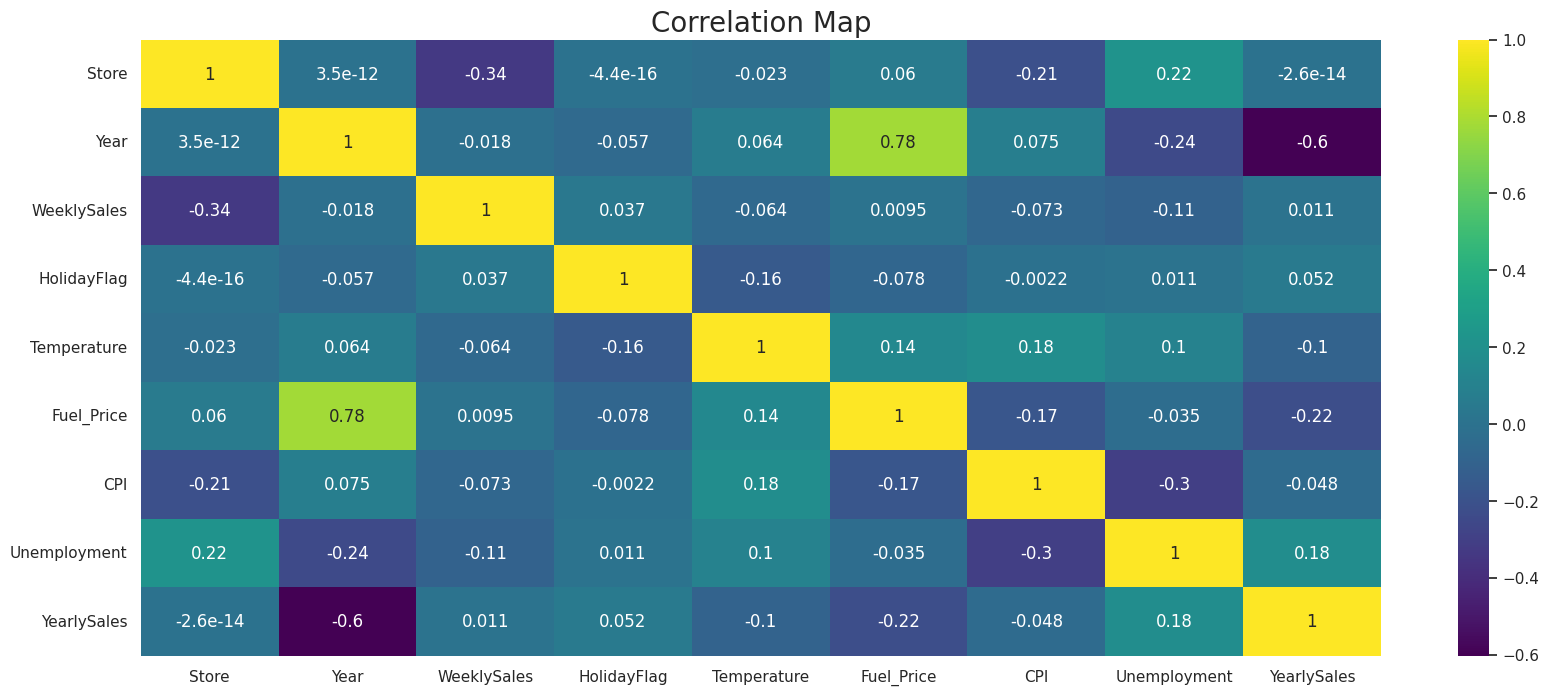

In [ ]:
#visualizing correlation
plt.figure(figsize=(20,8))
sns.heatmap(data=Walmart_new_corr,annot = True,cmap= "viridis")
plt.title("Correlation Map", fontdict={"fontsize":20})
plt.show()

In [ ]:
X=Walmart_new.drop(["HolidayFlag"],axis = 1)#Independent Variable
X

,Store,Year,WeeklySales,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
0,1,2010,1643690,42.31,2.572,211.096358,8.106,2288885060
1,1,2010,1641957,38.51,2.548,211.242170,8.106,2288885060
2,1,2010,1611968,39.93,2.514,211.289143,8.106,2288885060
3,1,2010,1409727,46.63,2.561,211.319643,8.106,2288885060
4,1,2010,1554806,46.50,2.625,211.350143,8.106,2288885060
...,...,...,...,...,...,...,...,...
6430,45,2012,713173,64.88,3.997,192.013558,8.684,2000131911
6431,45,2012,733455,64.89,3.985,192.170412,8.667,2000131911
6432,45,2012,734464,54.47,4.000,192.327265,8.667,2000131911
6433,45,2012,718125,56.47,3.969,192.330854,8.667,2000131911


In [ ]:
y=Walmart_new[["HolidayFlag"]]#Dependent variable
y

,HolidayFlag
0,0
1,1
2,0
3,0
4,0
...,...
6430,0
6431,0
6432,0
6433,0


In [ ]:
scaler = StandardScaler()
scaler

StandardScaler()

In [ ]:
X_normalize=pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_normalize

,Store,Year,WeeklySales,Temperature,Fuel_Price,CPI,Unemployment,YearlySales
0,-1.693979,-1.210899,1.057419,-0.995136,-1.713800,1.004175,0.056964,0.157953
1,-1.693979,-1.210899,1.054348,-1.201170,-1.766089,1.007880,0.056964,0.157953
2,-1.693979,-1.210899,1.001206,-1.124178,-1.840166,1.009074,0.056964,0.157953
3,-1.693979,-1.210899,0.642828,-0.760907,-1.737766,1.009849,0.056964,0.157953
4,-1.693979,-1.210899,0.899913,-0.767955,-1.598328,1.010624,0.056964,0.157953
...,...,...,...,...,...,...,...,...
6430,1.693979,1.298645,-0.591490,0.228602,1.390883,0.519270,0.365109,-1.420469
6431,1.693979,1.298645,-0.555550,0.229144,1.364738,0.523256,0.356046,-1.420469
6432,1.693979,1.298645,-0.553762,-0.335825,1.397419,0.527241,0.356046,-1.420469
6433,1.693979,1.298645,-0.582715,-0.227385,1.329879,0.527332,0.356046,-1.420469


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_normalize, y, test_size=0.33, random_state=1, stratify =y)

In [ ]:
len(X_train)

4311

In [ ]:
len(y_test)

2124

In [ ]:
classifiers=[LogisticRegression(random_state=42),RandomForestClassifier(random_state=42),
            SVC(random_state=42),XGBClassifier(random_state=42)]
model_names= ["Logistic Regression","Random Forest", "Support Vector Machine","XGradient boost"]

In [ ]:
def train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test):
    reports = []
    for clf, model in zip(classifiers, model_names):
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        report = classification_report(y_test, y_pred)
        reports.append(report)
    return model_names, reports

In [ ]:
model_names, report = train_val_models(classifiers, model_names, X_train, X_test, y_train, y_test)

In [ ]:
for name, report in zip(model_names, report):
    print(name)
    print(report)
    print("\n\n")

Logistic Regression
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1975
           1       0.00      0.00      0.00       149

    accuracy                           0.93      2124
   macro avg       0.46      0.50      0.48      2124
weighted avg       0.86      0.93      0.90      2124




Random Forest
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1975
           1       0.80      0.08      0.15       149

    accuracy                           0.93      2124
   macro avg       0.87      0.54      0.56      2124
weighted avg       0.93      0.93      0.91      2124




Support Vector Machine
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1975
           1       0.00      0.00      0.00       149

    accuracy                           0.93      2124
   macro avg       0.46      0.50      0.48      2124
weighted av

Names of Contributors

Grace Samuel,
Chinasa Emeji,
Boluwatife Olatunde,
Amira Mahmoud,
Vigmah Solomon,
Lolade Oluwadare,
Egenti Faith,
Sarah Chitaha.